# G-Formula for time-varying causal inference.

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
import sys
sys.path.append('../')

In [3]:
from causallib.contrib.gformula import GFormula
from causallib.contrib.gformula.treament_strategy import Observational, CFBernoulli
from causallib.datasets import load_synth_dynamic_treat

# Load the data.

See [Data description](https://github.com/pchakraborty1/causallib/blob/test_cases_issue_1/causallib/datasets/data/synthetic_dynamic_treatment/README.md) for full details on how data was generated

In [4]:
data_obsv = load_synth_dynamic_treat(observational=True)
print(data_obsv.keys())

dict_keys(['train', 'val', 'test'])


In [5]:
X_train, a_train = data_obsv['train']
X_val, a_val = data_obsv['val']

In [6]:
X_train.head()

,id,time,cov1,cov2
0,879,0.0,0.342062,0.524780
1,879,1.0,-0.527272,1.558539
2,879,2.0,-0.093776,-1.870982
3,879,3.0,0.951830,-1.308153
4,879,4.0,1.472708,0.923776


In [7]:
a_train.head()

,id,time,treatment
0,879,0.0,0
1,879,1.0,1
2,879,2.0,0
3,879,3.0,0
4,879,4.0,0


# Initialize
1. Covariate models in a sorted order for each covariate
2. Treatment model

In [8]:
covariate_models = {
    'cov1':  LinearRegression(),
    'cov2': LinearRegression()
}
treatment_models = {
    'treatment': LogisticRegression(solver="liblinear")
}

In [9]:
gFormula = GFormula(treatment_models=treatment_models,
                    covariate_models=covariate_models,
                    outcome_model=None,
                    refit_models=False,
                    random_state=None,
                    n_obsv=5,
                    n_sims=3,
                    n_steps=50,
                    mode='normal',
                    resid_val=None,
                    )

# Fit the covariate and treatment models prior to estimate the outcome

In [10]:
gFormula.fit(X_train, a_train, t=None, y=None)

/opt/miniconda3/envs/gnet/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GFormula(covariate_models={'cov1': LinearRegression(), 'cov2': LinearRegression()}, id_col=id, mode=normal, n_obsv=5, n_sims=3, n_steps=50, outcome_model=None, predict_proba=False, random_state=None, refit_models=False, resid_val=None, time_col=time, treatment_models={'treatment': LogisticRegression(solver='liblinear')})

# Estimate the outcomes
Define treatment strategy to be used to generate the treatment action for the simulation.

In [11]:
# treatment_strategy = CFBernoulli()
# treatment_strategy = Observational(inverse_transform=None)
treatment_strategy = 'observational'

## Estimate the outcome in individual level

In [12]:
#a = df_obs[['id', 'A']]
est_outcome = gFormula.estimate_individual_outcome(
                                                    X_train,
                                                    a_train,
                                                    t=None,
                                                    y=None,
                                                    treatment_strategy=treatment_strategy
                                                )
est_outcome

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:    2.7s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    3.2s
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:    3.5s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    3.8s
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    4.4s
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed:  

,cov1,cov2,treatment,id,time
0,1.249648,-0.353210,0.333333,879,5
1,2.144965,-1.125140,0.666667,879,6
2,1.545197,0.259999,0.666667,879,7
3,2.907713,-1.184010,0.333333,879,8
4,2.775222,-0.056025,1.000000,879,9
...,...,...,...,...,...
45,16.565990,-0.583067,0.333333,287,50
46,16.632335,-0.113498,0.666667,287,51
47,16.524523,0.284674,0.666667,287,52
48,17.085961,0.128609,0.333333,287,53


## Estimate the outcome in population level

In [15]:
# a = df_obs[['id', 'A']]
pop_outcome = gFormula.estimate_population_outcome(
                                                    X_train,
                                                    a_train,
                                                    t=None,
                                                    y=None,
                                                    treatment_strategy=treatment_strategy
                                                  )
pop_outcome.reset_index(inplace=True)
pop_outcome

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:    2.3s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    3.3s
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed:  

,time,cov1,cov2,treatment,id
0,5,2.551945,0.014554,0.407407,500.303704
1,6,2.988096,0.016122,0.438272,500.303704
2,7,3.415912,0.006534,0.436214,500.303704
3,8,3.837352,0.012232,0.438683,500.303704
4,9,4.271607,0.004965,0.466255,500.303704
5,10,4.695567,0.023284,0.432510,500.303704
6,11,5.166037,0.005243,0.462140,500.303704
7,12,5.622042,-0.013177,0.468724,500.303704
8,13,6.097879,-0.004359,0.461728,500.303704
9,14,6.556953,-0.037531,0.467490,500.303704


In [17]:
df_obsv_train = X_train.merge(a_train, on=[gFormula.id_col, gFormula.time_col])
obsv = df_obsv_train.groupby(df_obsv_train[gFormula.time_col]).mean()
obsv.reset_index(inplace=True)
obsv

,time,id,cov1,cov2,treatment
0,0.0,500.303704,0.539881,0.052033,0.500000
1,1.0,500.303704,0.926680,0.017426,0.413580
2,2.0,500.303704,1.316447,0.031917,0.388889
3,3.0,500.303704,1.711928,0.064828,0.434568
4,4.0,500.303704,2.146545,-0.003312,0.406173
5,5.0,500.303704,2.581854,0.029581,0.417284
6,6.0,500.303704,2.987819,-0.037136,0.437037
7,7.0,500.303704,3.415080,0.004250,0.413580
8,8.0,500.303704,3.831683,0.009599,0.413580
9,9.0,500.303704,4.259143,-0.028260,0.449383


# Plot the Graph (Simulated Vs Observed) for covariates 'X', 'X2' and treatment 'a'

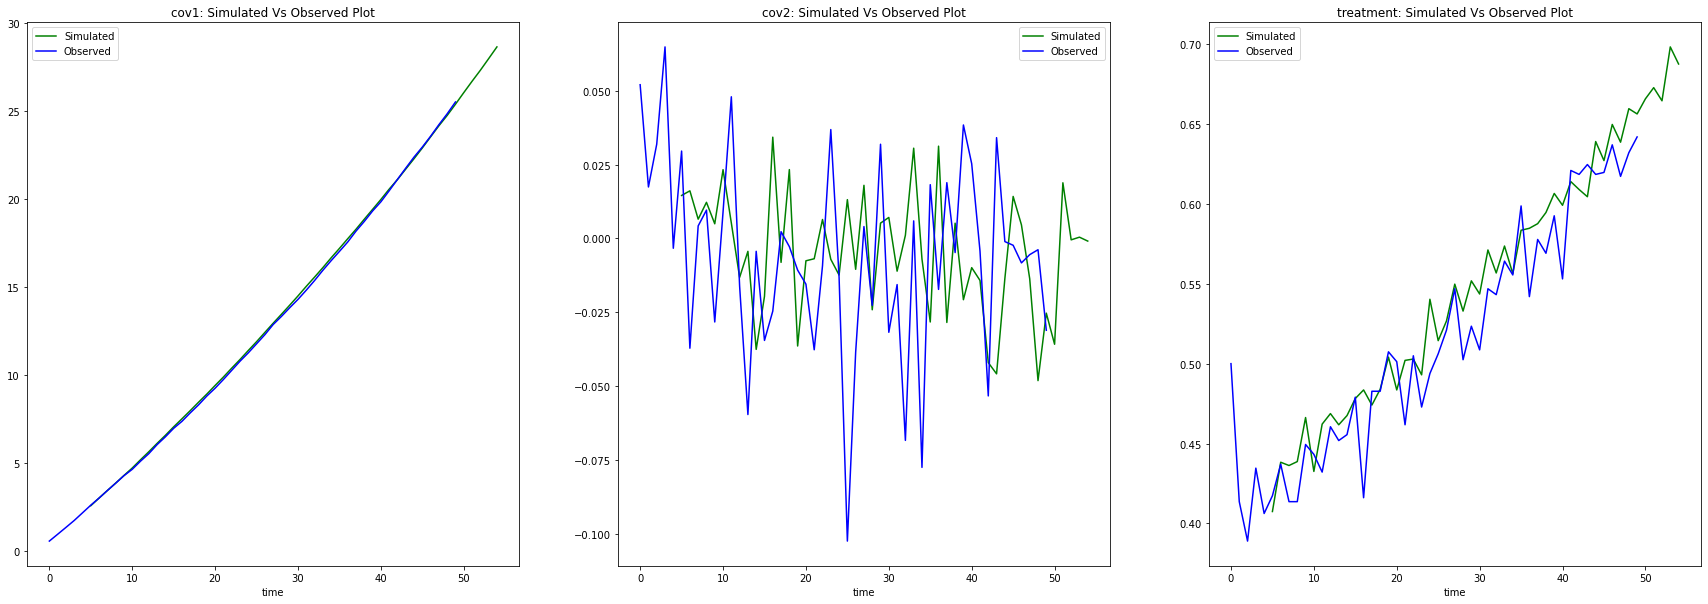

In [20]:
import matplotlib.pyplot as plt
#Get current axis
fig, axX = plt.subplots(1, 3, figsize=(30, 10))

for idx, y in enumerate(['cov1', 'cov2', 'treatment']):
    ax = axX.flatten()[idx]
    pop_outcome.plot(kind='line', x=gFormula.time_col, y=y, color='green', ax = ax)
    obsv.plot(kind='line', x=gFormula.time_col, y=y, color='blue', ax = ax)
    ax.legend(['Simulated', 'Observed'])
    ax.set_title(f'{y}: Simulated Vs Observed Plot')